### ATG data and category - using hitcall data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import glob

In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
interim_dir = TOP + 'data/interim/'
processed_dir = TOP + 'data/processed/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

Read in TxP categories

In [3]:
pfasivt = pd.read_csv(processed_dir+'ivt_TxP_assignments.csv')

In [4]:
pfasivt.head()

,Unnamed: 0,DTXSID,Txp_cats
0,0,DTXSID5027140,TxP_PFAS_sulfonyl
1,1,DTXSID5027140,TxP_PFAS_sulfonylhalide
2,2,DTXSID5027140,TxP_PFAS_perFoctyl
3,3,DTXSID6027426,TxP_PFAS_alcohol
4,4,DTXSID6027426,TxP_PFAS_alcohol_primary


In [5]:
pfasivt = pfasivt.iloc[:,1:]

In [6]:
pfasivt.head()

,DTXSID,Txp_cats
0,DTXSID5027140,TxP_PFAS_sulfonyl
1,DTXSID5027140,TxP_PFAS_sulfonylhalide
2,DTXSID5027140,TxP_PFAS_perFoctyl
3,DTXSID6027426,TxP_PFAS_alcohol
4,DTXSID6027426,TxP_PFAS_alcohol_primary


In [11]:
import sqlalchemy as sa

In [7]:
import getpass

In [8]:
password = getpass.getpass()


 ········


In [9]:
username = 'grace'
host = 'localhost'

In [14]:
pfas_db = sa.create_engine(f"""mysql+pymysql://{username}:{password}@{host}/pfas_db_20220401""")

In [16]:
atg_long = pd.read_sql('''select * from HTS where source = 'ATG' and sample_qc = 'P'  ''', pfas_db)

In [17]:
atg_long.dtxsid.nunique()

117

In [18]:
atg_long

,index,dtxsid,casrn,name,spid,hts_assay_name,source,gene_symbol,hitcall,pod,pod_type,top,sample_qc,flag
0,0,DTXSID70276659,65294-16-8,"Perfluoro-(2,5,8-trimethyl-3,6,9-trioxadodecan...",01504044,ATG_Ahr_CIS_up,ATG,AHR,0.0,1000.0,AC50,0.000000,P,P
1,1,DTXSID70276659,65294-16-8,"Perfluoro-(2,5,8-trimethyl-3,6,9-trioxadodecan...",01504044,ATG_AP_1_CIS_up,ATG,FOS,0.0,1000.0,AC50,0.000000,P,P
2,2,DTXSID70276659,65294-16-8,"Perfluoro-(2,5,8-trimethyl-3,6,9-trioxadodecan...",01504044,ATG_AP_2_CIS_up,ATG,TFAP2A,0.0,1000.0,AC50,0.000000,P,P
3,3,DTXSID70276659,65294-16-8,"Perfluoro-(2,5,8-trimethyl-3,6,9-trioxadodecan...",01504044,ATG_BRE_CIS_up,ATG,SMAD1,0.0,1000.0,AC50,0.000000,P,P
4,4,DTXSID70276659,65294-16-8,"Perfluoro-(2,5,8-trimethyl-3,6,9-trioxadodecan...",01504044,ATG_C_EBP_CIS_up,ATG,CEBPB,0.0,1000.0,AC50,0.000000,P,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27413,152706,DTXSID3031864,1763-23-1,Perfluorooctanesulfonic acid,TP0001285E02,ATG_THRa1_TRANS_dn,ATG,THRA,0.0,1000.0,AC50,0.927887,P,"Z, I"
27414,152707,DTXSID3031864,1763-23-1,Perfluorooctanesulfonic acid,TP0001285E02,ATG_VDRE_CIS_dn,ATG,VDR,0.0,1000.0,AC50,0.000000,P,"Z, I"
27415,152708,DTXSID3031864,1763-23-1,Perfluorooctanesulfonic acid,TP0001285E02,ATG_VDR_TRANS_dn,ATG,VDR,0.0,1000.0,AC50,0.000000,P,"Z, I"
27416,152709,DTXSID3031864,1763-23-1,Perfluorooctanesulfonic acid,TP0001285E02,ATG_Xbp1_CIS_dn,ATG,XBP1,0.0,1000.0,AC50,0.000000,P,"Z, I"


In [19]:

atg_wide = atg_long.pivot_table(index = 'dtxsid', columns = 'hts_assay_name', values = 'hitcall', aggfunc = 'max')

In [20]:
atg_long.dtxsid.nunique()

117

In [21]:
atg_wide

hts_assay_name,ATG_AP_1_CIS_dn,ATG_AP_1_CIS_up,ATG_AP_2_CIS_dn,ATG_AP_2_CIS_up,ATG_AR_TRANS_dn,ATG_AR_TRANS_up,ATG_Ahr_CIS_dn,ATG_Ahr_CIS_up,ATG_BRE_CIS_dn,ATG_BRE_CIS_up,...,ATG_VDRE_CIS_dn,ATG_VDRE_CIS_up,ATG_VDR_TRANS_dn,ATG_VDR_TRANS_up,ATG_XTT_Cytotoxicity_dn,ATG_XTT_Cytotoxicity_up,ATG_Xbp1_CIS_dn,ATG_Xbp1_CIS_up,ATG_p53_CIS_dn,ATG_p53_CIS_up
dtxsid,,,,,,,,,,,,,,,,,,,,,
DTXSID00190950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0
DTXSID00192353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
DTXSID00194615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,NaN,NaN,0.0,1.0,0.0,0.0
DTXSID00379268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
DTXSID00379884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID90382620,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0
DTXSID9059832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
DTXSID9061881,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0


In [22]:
atg_wide.index.name = None
atg_wide.columns.name = None

In [23]:
atg_wide

,ATG_AP_1_CIS_dn,ATG_AP_1_CIS_up,ATG_AP_2_CIS_dn,ATG_AP_2_CIS_up,ATG_AR_TRANS_dn,ATG_AR_TRANS_up,ATG_Ahr_CIS_dn,ATG_Ahr_CIS_up,ATG_BRE_CIS_dn,ATG_BRE_CIS_up,...,ATG_VDRE_CIS_dn,ATG_VDRE_CIS_up,ATG_VDR_TRANS_dn,ATG_VDR_TRANS_up,ATG_XTT_Cytotoxicity_dn,ATG_XTT_Cytotoxicity_up,ATG_Xbp1_CIS_dn,ATG_Xbp1_CIS_up,ATG_p53_CIS_dn,ATG_p53_CIS_up
DTXSID00190950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0
DTXSID00192353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
DTXSID00194615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,NaN,NaN,0.0,1.0,0.0,0.0
DTXSID00379268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
DTXSID00379884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID90382620,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0
DTXSID9059832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
DTXSID9061881,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
DTXSID90868151,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0


#### Visualising the ToxCast hitcall data available across all assays

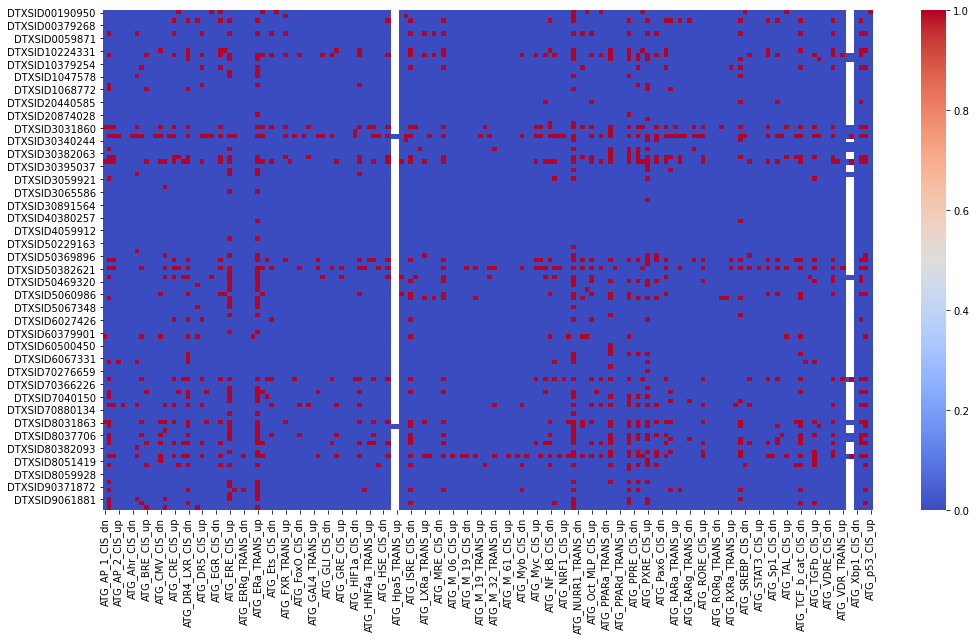

In [24]:
plt.figure(figsize = (15,9))
sns.heatmap(atg_wide, cmap = 'coolwarm')
plt.tight_layout()

In [25]:
atg_wide = atg_wide[[e for e in atg_wide.columns if 'up' in e]]

In [26]:
atg_wide = atg_wide.dropna(how = 'any', axis = 1)

Merging ATG data with TxP categories

In [27]:
atg_hc_idx = atg_wide.copy().reset_index()

In [28]:
atg_hc_idx

,index,ATG_AP_1_CIS_up,ATG_AP_2_CIS_up,ATG_AR_TRANS_up,ATG_Ahr_CIS_up,ATG_BRE_CIS_up,ATG_CAR_TRANS_up,ATG_CMV_CIS_up,ATG_CRE_CIS_up,ATG_C_EBP_CIS_up,...,ATG_Sp1_CIS_up,ATG_TAL_CIS_up,ATG_TA_CIS_up,ATG_TCF_b_cat_CIS_up,ATG_TGFb_CIS_up,ATG_THRa1_TRANS_up,ATG_VDRE_CIS_up,ATG_VDR_TRANS_up,ATG_Xbp1_CIS_up,ATG_p53_CIS_up
0,DTXSID00190950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,DTXSID00192353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DTXSID00194615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,DTXSID00379268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DTXSID00379884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,DTXSID90382620,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113,DTXSID9059832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,DTXSID9061881,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115,DTXSID90868151,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [29]:
atg_hc_cats = pd.merge(atg_hc_idx,pfasivt,  left_on = 'index', right_on = 'DTXSID', how = 'left')

In [31]:
atg_hc_cats.drop(['DTXSID'], axis = 1)

,index,ATG_AP_1_CIS_up,ATG_AP_2_CIS_up,ATG_AR_TRANS_up,ATG_Ahr_CIS_up,ATG_BRE_CIS_up,ATG_CAR_TRANS_up,ATG_CMV_CIS_up,ATG_CRE_CIS_up,ATG_C_EBP_CIS_up,...,ATG_TAL_CIS_up,ATG_TA_CIS_up,ATG_TCF_b_cat_CIS_up,ATG_TGFb_CIS_up,ATG_THRa1_TRANS_up,ATG_VDRE_CIS_up,ATG_VDR_TRANS_up,ATG_Xbp1_CIS_up,ATG_p53_CIS_up,Txp_cats
0,DTXSID00190950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TxP_PFAS_alcohol
1,DTXSID00190950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TxP_PFAS_alcohol_primary
2,DTXSID00190950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TxP_PFAS_alcohol_primary_FTn1
3,DTXSID00190950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TxP_PFAS_perFhexyl
4,DTXSID00192353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TxP_PFAS_sulfonyl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,DTXSID9061881,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TxP_PFAS_alkylXprimary
271,DTXSID90868151,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,TxP_PFAS_COOH
272,DTXSID90868151,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,TxP_PFAS_perFoctyl
273,DTXSID90880156,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TxP_PFAS_perFhexyl


In [32]:
atg_hc_cats.set_index('index', inplace = True)

In [33]:
atg_hc_cats.index.name = None

In [34]:
atg_hc_cats.Txp_cats.nunique()

32

In [35]:
atg_hc_cats.groupby('Txp_cats').size()

Txp_cats
TxP_PFAS_COOH                       30
TxP_PFAS_COOH_FT                     3
TxP_PFAS_COOH_ether                  7
TxP_PFAS_COOH_ethylene               2
TxP_PFAS_COOR                        3
TxP_PFAS_acrylate                   11
TxP_PFAS_acylhalide                  1
TxP_PFAS_alcohol                    23
TxP_PFAS_alcohol_polyF               2
TxP_PFAS_alcohol_primary            21
TxP_PFAS_alcohol_primary_FT_diol     1
TxP_PFAS_alcohol_primary_FTn1       11
TxP_PFAS_alcohol_primary_FTn2        7
TxP_PFAS_alcohol_sulfonylamide       2
TxP_PFAS_alkylXprimary               4
TxP_PFAS_alkylXtertiaryxCO           1
TxP_PFAS_amine                       2
TxP_PFAS_amine_primary               1
TxP_PFAS_carboxamide                 7
TxP_PFAS_ether                      16
TxP_PFAS_ethylene_xCO                1
TxP_PFAS_ketone                      3
TxP_PFAS_oxidehydroxy                9
TxP_PFAS_perFhexyl                  28
TxP_PFAS_perFoctyl                  27
TxP_PFAS_silane 

In [60]:
hc3 = atg_hc_cats.groupby('Txp_cats').filter(lambda x: len(x) >= 3)

In [61]:
hc3.Txp_cats.nunique()

22

In [57]:
reorder_index = ['TxP_PFAS_perFhexyl','TxP_PFAS_perFoctyl','TxP_PFAS_alcohol', 'TxP_PFAS_alcohol_primary',
       'TxP_PFAS_alcohol_primary_FTn1', 'TxP_PFAS_alcohol_primary_FTn2','TxP_PFAS_ether','TxP_PFAS_oxidehydroxy','TxP_PFAS_silane',
       'TxP_PFAS_sulfonyl', 'TxP_PFAS_sulfonate',
       'TxP_PFAS_sulfonate_FTn2', 'TxP_PFAS_sulfonylhalide','TxP_PFAS_sulfonamide', 'TxP_PFAS_COOH', 
       'TxP_PFAS_COOH_FT', 'TxP_PFAS_COOH_ether', 'TxP_PFAS_carboxamide','TxP_PFAS_COOR','TxP_PFAS_acrylate',  'TxP_PFAS_ketone',  
       
        
       'TxP_PFAS_alkylXprimary'
       
       ]

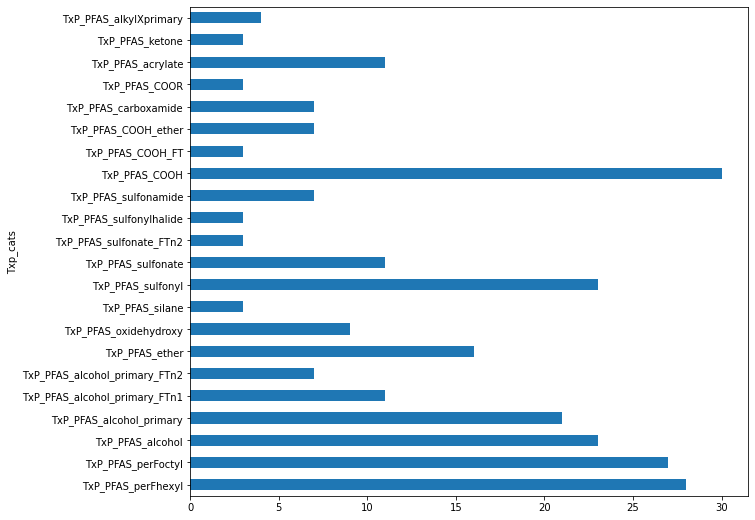

In [59]:
plt.figure(figsize = (10,9))
hc3.groupby('Txp_cats').size().reindex(reorder_index).plot.barh()
plt.savefig(figures_dir+'TxPcats_ATG_100222.png', dpi = 300, bbox_inches="tight")

In [38]:
hc3.index.nunique()

115

In [39]:
cat_df = pd.get_dummies(hc3.Txp_cats).reset_index()


In [40]:
cat_df

,index,TxP_PFAS_COOH,TxP_PFAS_COOH_FT,TxP_PFAS_COOH_ether,TxP_PFAS_COOR,TxP_PFAS_acrylate,TxP_PFAS_alcohol,TxP_PFAS_alcohol_primary,TxP_PFAS_alcohol_primary_FTn1,TxP_PFAS_alcohol_primary_FTn2,...,TxP_PFAS_ketone,TxP_PFAS_oxidehydroxy,TxP_PFAS_perFhexyl,TxP_PFAS_perFoctyl,TxP_PFAS_silane,TxP_PFAS_sulfonamide,TxP_PFAS_sulfonate,TxP_PFAS_sulfonate_FTn2,TxP_PFAS_sulfonyl,TxP_PFAS_sulfonylhalide
0,DTXSID00190950,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,DTXSID00190950,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,DTXSID00190950,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,DTXSID00190950,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,DTXSID00192353,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,DTXSID9061881,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256,DTXSID90868151,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
257,DTXSID90868151,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
258,DTXSID90880156,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [41]:
cat_df = cat_df.groupby('index').agg(lambda x: x.sum())

In [43]:
cat_df = cat_df.applymap(lambda x: 1 if x >1 else x)
cat_df

,TxP_PFAS_COOH,TxP_PFAS_COOH_FT,TxP_PFAS_COOH_ether,TxP_PFAS_COOR,TxP_PFAS_acrylate,TxP_PFAS_alcohol,TxP_PFAS_alcohol_primary,TxP_PFAS_alcohol_primary_FTn1,TxP_PFAS_alcohol_primary_FTn2,TxP_PFAS_alkylXprimary,...,TxP_PFAS_ketone,TxP_PFAS_oxidehydroxy,TxP_PFAS_perFhexyl,TxP_PFAS_perFoctyl,TxP_PFAS_silane,TxP_PFAS_sulfonamide,TxP_PFAS_sulfonate,TxP_PFAS_sulfonate_FTn2,TxP_PFAS_sulfonyl,TxP_PFAS_sulfonylhalide
index,,,,,,,,,,,,,,,,,,,,,
DTXSID00190950,0,0,0,0,0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
DTXSID00192353,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,1,1,0
DTXSID00194615,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
DTXSID00379268,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DTXSID00379884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID90382620,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
DTXSID9059832,0,0,0,0,0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
DTXSID9061881,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [44]:
hc3.drop('Txp_cats', axis = 1, inplace = True)

In [45]:
hc3 = hc3.reset_index()

In [46]:
hc3 = hc3.drop_duplicates(subset = 'index', keep = 'first')

In [47]:
hc3

,index,ATG_AP_1_CIS_up,ATG_AP_2_CIS_up,ATG_AR_TRANS_up,ATG_Ahr_CIS_up,ATG_BRE_CIS_up,ATG_CAR_TRANS_up,ATG_CMV_CIS_up,ATG_CRE_CIS_up,ATG_C_EBP_CIS_up,...,ATG_TAL_CIS_up,ATG_TA_CIS_up,ATG_TCF_b_cat_CIS_up,ATG_TGFb_CIS_up,ATG_THRa1_TRANS_up,ATG_VDRE_CIS_up,ATG_VDR_TRANS_up,ATG_Xbp1_CIS_up,ATG_p53_CIS_up,DTXSID
0,DTXSID00190950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,DTXSID00190950
4,DTXSID00192353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DTXSID00192353
9,DTXSID00194615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,DTXSID00194615
11,DTXSID00379268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DTXSID00379268
13,DTXSID00379884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DTXSID00379884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,DTXSID90382620,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DTXSID90382620
251,DTXSID9059832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DTXSID9059832
255,DTXSID9061881,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DTXSID9061881
256,DTXSID90868151,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,DTXSID90868151


In [48]:
df1 = pd.merge(hc3, cat_df, left_on = 'index', right_on = cat_df.index, how = 'left')

In [49]:
df1 = df1.set_index('index')
df1.index.name = None

In [50]:
df1.drop(['DTXSID'], axis = 1, inplace = True)

In [51]:
import scipy.stats as stats

In [52]:
df1.columns.get_loc('TxP_PFAS_COOH')

81

### Odds Ratio for TxP Categories

In [92]:
txp_lst = df1.iloc[:,81:].columns.tolist()

In [93]:
print(txp_lst)

['TxP_PFAS_COOH', 'TxP_PFAS_COOH_FT', 'TxP_PFAS_COOH_ether', 'TxP_PFAS_COOR', 'TxP_PFAS_acrylate', 'TxP_PFAS_alcohol', 'TxP_PFAS_alcohol_primary', 'TxP_PFAS_alcohol_primary_FTn1', 'TxP_PFAS_alcohol_primary_FTn2', 'TxP_PFAS_alkylXprimary', 'TxP_PFAS_carboxamide', 'TxP_PFAS_ether', 'TxP_PFAS_ketone', 'TxP_PFAS_oxidehydroxy', 'TxP_PFAS_perFhexyl', 'TxP_PFAS_perFoctyl', 'TxP_PFAS_silane', 'TxP_PFAS_sulfonamide', 'TxP_PFAS_sulfonate', 'TxP_PFAS_sulfonate_FTn2', 'TxP_PFAS_sulfonyl', 'TxP_PFAS_sulfonylhalide']


In [96]:
df1.iloc[:, :81]

,ATG_AP_1_CIS_up,ATG_AP_2_CIS_up,ATG_AR_TRANS_up,ATG_Ahr_CIS_up,ATG_BRE_CIS_up,ATG_CAR_TRANS_up,ATG_CMV_CIS_up,ATG_CRE_CIS_up,ATG_C_EBP_CIS_up,ATG_DR4_LXR_CIS_up,...,ATG_TAL_CIS_up,ATG_TA_CIS_up,ATG_TCF_b_cat_CIS_up,ATG_TGFb_CIS_up,ATG_THRa1_TRANS_up,ATG_VDRE_CIS_up,ATG_VDR_TRANS_up,ATG_Xbp1_CIS_up,ATG_p53_CIS_up,TxP_PFAS_COOH
DTXSID00190950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
DTXSID00192353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
DTXSID00194615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
DTXSID00379268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
DTXSID00379884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID90382620,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
DTXSID9059832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
DTXSID9061881,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
DTXSID90868151,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [97]:
#for i, column in df1.iloc[:,0:66].iteritems():
#    print(i,column)

In [98]:
mylst = []
for e in txp_lst:
    for i, column in df1.iloc[:,:81].iteritems():
        if pd.crosstab(df1[e].values, column).shape == (2,2):
            oddsratio, pvalue = stats.fisher_exact(pd.crosstab(df1[e].values, column)) 
            mylst.append([oddsratio, pvalue, i,e])

In [99]:
def convert(lst):
    mydf = pd.DataFrame(lst)
    mydf.rename(columns = {0: 'OR', 1: 'p', 2 : 'Assay', 3: 'TxP_Cat'}, inplace = True)
    return mydf

In [100]:
odd_ratios = convert(mylst)

In [101]:
odd_ratios.head()

,OR,p,Assay,TxP_Cat
0,1.881579,0.230620,ATG_AP_1_CIS_up,TxP_PFAS_COOH
1,0.000000,1.000000,ATG_AP_2_CIS_up,TxP_PFAS_COOH
2,0.603175,0.725398,ATG_Ahr_CIS_up,TxP_PFAS_COOH
3,0.000000,0.187245,ATG_BRE_CIS_up,TxP_PFAS_COOH
4,0.000000,1.000000,ATG_CAR_TRANS_up,TxP_PFAS_COOH


In [102]:
mask = (odd_ratios['OR'] >= 3) & (odd_ratios['p'] <0.05)
enriched_assays = odd_ratios[mask]

In [137]:
enriched_assays

,OR,p,Assay,TxP_Cat
42,6.163043,0.006681,ATG_NURR1_TRANS_up,TxP_PFAS_COOH
45,4.312500,0.001677,ATG_PPARa_TRANS_up,TxP_PFAS_COOH
46,3.047619,0.012907,ATG_PPARg_TRANS_up,TxP_PFAS_COOH
47,3.692308,0.008850,ATG_PPRE_CIS_up,TxP_PFAS_COOH
185,7.884615,0.014990,ATG_PPARa_TRANS_up,TxP_PFAS_COOH_ether
...,...,...,...,...
1425,inf,0.007173,ATG_IR1_CIS_up,TxP_PFAS_sulfonyl
1447,3.948718,0.009254,ATG_PPRE_CIS_up,TxP_PFAS_sulfonyl
1448,4.407407,0.002592,ATG_PXRE_CIS_up,TxP_PFAS_sulfonyl
1449,3.587500,0.042303,ATG_PXR_TRANS_up,TxP_PFAS_sulfonyl


In [103]:
enriched_dict = {}
for i, group in enriched_assays.groupby('TxP_Cat'):
    enriched_dict[i] = group

In [138]:
len(enriched_dict.keys())

13

In [139]:
enriched_dict.keys()

dict_keys(['TxP_PFAS_COOH', 'TxP_PFAS_COOH_ether', 'TxP_PFAS_acrylate', 'TxP_PFAS_alcohol', 'TxP_PFAS_alcohol_primary', 'TxP_PFAS_alcohol_primary_FTn2', 'TxP_PFAS_alkylXprimary', 'TxP_PFAS_oxidehydroxy', 'TxP_PFAS_perFhexyl', 'TxP_PFAS_perFoctyl', 'TxP_PFAS_sulfonamide', 'TxP_PFAS_sulfonate', 'TxP_PFAS_sulfonyl'])

In [150]:
enriched_dict['TxP_PFAS_perFoctyl']

,OR,p,Assay,TxP_Cat
1050,5.625000,0.000331,ATG_AP_1_CIS_up,TxP_PFAS_perFoctyl
1056,8.039216,0.000342,ATG_CRE_CIS_up,TxP_PFAS_perFoctyl
1058,11.929825,0.000369,ATG_DR5_CIS_up,TxP_PFAS_perFoctyl
1060,6.806723,0.000703,ATG_EGR_CIS_up,TxP_PFAS_perFoctyl
1062,3.176471,0.014632,ATG_ERa_TRANS_up,TxP_PFAS_perFoctyl
1065,12.285714,0.002052,ATG_FXR_TRANS_up,TxP_PFAS_perFoctyl
1071,4.210526,0.011854,ATG_HIF1a_CIS_up,TxP_PFAS_perFoctyl
1074,10.500000,0.000244,ATG_HSE_CIS_up,TxP_PFAS_perFoctyl
1077,24.857143,0.000615,ATG_LXRa_TRANS_up,TxP_PFAS_perFoctyl
1079,6.240000,0.000406,ATG_MRE_CIS_up,TxP_PFAS_perFoctyl


In [151]:
enriched_dict['TxP_PFAS_perFhexyl']

,OR,p,Assay,TxP_Cat
991,4.464000,0.001369,ATG_ERE_CIS_up,TxP_PFAS_perFhexyl
992,3.454545,0.008324,ATG_ERa_TRANS_up,TxP_PFAS_perFhexyl


In [53]:
# scipy
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as hc
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.cluster.hierarchy import inconsistent

In [62]:
hc3

,ATG_AP_1_CIS_up,ATG_AP_2_CIS_up,ATG_AR_TRANS_up,ATG_Ahr_CIS_up,ATG_BRE_CIS_up,ATG_CAR_TRANS_up,ATG_CMV_CIS_up,ATG_CRE_CIS_up,ATG_C_EBP_CIS_up,ATG_DR4_LXR_CIS_up,...,ATG_TA_CIS_up,ATG_TCF_b_cat_CIS_up,ATG_TGFb_CIS_up,ATG_THRa1_TRANS_up,ATG_VDRE_CIS_up,ATG_VDR_TRANS_up,ATG_Xbp1_CIS_up,ATG_p53_CIS_up,DTXSID,Txp_cats
DTXSID00190950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,DTXSID00190950,TxP_PFAS_alcohol
DTXSID00190950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,DTXSID00190950,TxP_PFAS_alcohol_primary
DTXSID00190950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,DTXSID00190950,TxP_PFAS_alcohol_primary_FTn1
DTXSID00190950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,DTXSID00190950,TxP_PFAS_perFhexyl
DTXSID00192353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DTXSID00192353,TxP_PFAS_sulfonyl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID9061881,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DTXSID9061881,TxP_PFAS_alkylXprimary
DTXSID90868151,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,DTXSID90868151,TxP_PFAS_COOH
DTXSID90868151,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,DTXSID90868151,TxP_PFAS_perFoctyl
DTXSID90880156,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DTXSID90880156,TxP_PFAS_perFhexyl


In [63]:
df = hc3.copy()

In [64]:
df.drop(['DTXSID'], axis = 1, inplace = True)

In [65]:
df

,ATG_AP_1_CIS_up,ATG_AP_2_CIS_up,ATG_AR_TRANS_up,ATG_Ahr_CIS_up,ATG_BRE_CIS_up,ATG_CAR_TRANS_up,ATG_CMV_CIS_up,ATG_CRE_CIS_up,ATG_C_EBP_CIS_up,ATG_DR4_LXR_CIS_up,...,ATG_TAL_CIS_up,ATG_TA_CIS_up,ATG_TCF_b_cat_CIS_up,ATG_TGFb_CIS_up,ATG_THRa1_TRANS_up,ATG_VDRE_CIS_up,ATG_VDR_TRANS_up,ATG_Xbp1_CIS_up,ATG_p53_CIS_up,Txp_cats
DTXSID00190950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TxP_PFAS_alcohol
DTXSID00190950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TxP_PFAS_alcohol_primary
DTXSID00190950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TxP_PFAS_alcohol_primary_FTn1
DTXSID00190950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,TxP_PFAS_perFhexyl
DTXSID00192353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TxP_PFAS_sulfonyl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID9061881,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TxP_PFAS_alkylXprimary
DTXSID90868151,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,TxP_PFAS_COOH
DTXSID90868151,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,TxP_PFAS_perFoctyl
DTXSID90880156,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TxP_PFAS_perFhexyl


In [66]:
bio_dict = {}
for i, group in df.groupby('Txp_cats'):
    bio_dict[i] = group.iloc[:,:-1]

In [68]:
#bio_dict['TxP_PFAS_COOH']

In [69]:
def distance_matrix(df):
    D_bio = pd.DataFrame(squareform(pdist(df, 'jaccard')), columns = df.index, index = df.index)
    return D_bio


In [70]:
dist_bio = {}
for k,v in bio_dict.items():
    a = distance_matrix(bio_dict[k])
    dist_bio[k] = a

In [76]:
mydfs = []
for i, group in df.groupby('Txp_cats'):
    a = pd.DataFrame(squareform(pdist(group.iloc[:,:-1].values, 'jaccard')), columns = group.index, index = group.index )
    s1 = 1-a
    s1 = s1.unstack()
    s1.index.rename(['DTXSID_x', 'DTXSID_y'], inplace = True)
    s1 = s1.to_frame('Jaccard').reset_index()
    s1['Cat'] = i
    mydfs.append(s1)


In [77]:
s1_cats = pd.concat(mydfs)

In [78]:
mask2 = (s1_cats['DTXSID_x'] != s1_cats['DTXSID_y'])

In [79]:
s1_catsf = s1_cats[mask2]

In [80]:
s1_catsf.head()

,DTXSID_x,DTXSID_y,Jaccard,Cat
1,DTXSID00379268,DTXSID1037303,0.0,TxP_PFAS_COOH
2,DTXSID00379268,DTXSID20375106,1.0,TxP_PFAS_COOH
3,DTXSID00379268,DTXSID20874028,0.0,TxP_PFAS_COOH
4,DTXSID00379268,DTXSID30170109,0.0,TxP_PFAS_COOH
5,DTXSID00379268,DTXSID3031860,0.0,TxP_PFAS_COOH


/home/grace/anaconda3/envs/pfas_dap/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 85.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/grace/anaconda3/envs/pfas_dap/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/grace/anaconda3/envs/pfas_dap/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 52.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/grace/anaconda3/envs/pfas_dap/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 51.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/grace/anaconda

[Text(0, 0, 'TxP_PFAS_COOH'),
 Text(1, 0, 'TxP_PFAS_COOH_FT'),
 Text(2, 0, 'TxP_PFAS_COOH_ether'),
 Text(3, 0, 'TxP_PFAS_COOR'),
 Text(4, 0, 'TxP_PFAS_acrylate'),
 Text(5, 0, 'TxP_PFAS_alcohol'),
 Text(6, 0, 'TxP_PFAS_alcohol_primary'),
 Text(7, 0, 'TxP_PFAS_alcohol_primary_FTn1'),
 Text(8, 0, 'TxP_PFAS_alcohol_primary_FTn2'),
 Text(9, 0, 'TxP_PFAS_alkylXprimary'),
 Text(10, 0, 'TxP_PFAS_carboxamide'),
 Text(11, 0, 'TxP_PFAS_ether'),
 Text(12, 0, 'TxP_PFAS_ketone'),
 Text(13, 0, 'TxP_PFAS_oxidehydroxy'),
 Text(14, 0, 'TxP_PFAS_perFhexyl'),
 Text(15, 0, 'TxP_PFAS_perFoctyl'),
 Text(16, 0, 'TxP_PFAS_silane'),
 Text(17, 0, 'TxP_PFAS_sulfonamide'),
 Text(18, 0, 'TxP_PFAS_sulfonate'),
 Text(19, 0, 'TxP_PFAS_sulfonate_FTn2'),
 Text(20, 0, 'TxP_PFAS_sulfonyl'),
 Text(21, 0, 'TxP_PFAS_sulfonylhalide')]

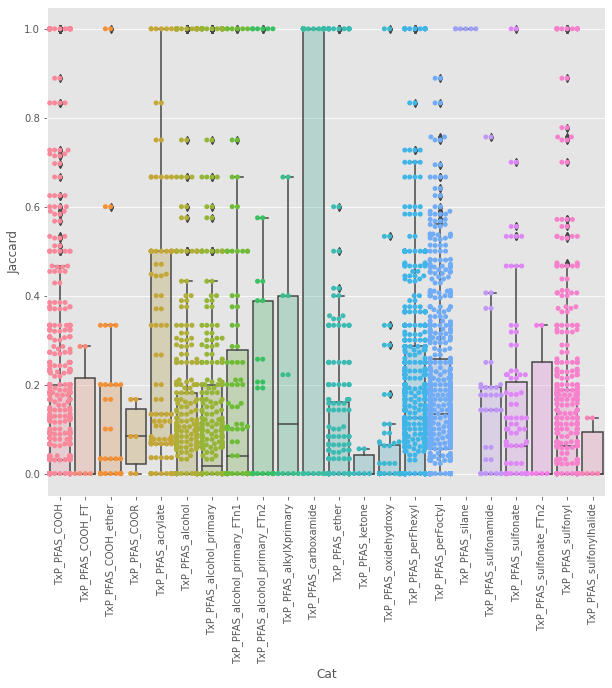

In [81]:
plt.style.use('ggplot')
plt.figure(figsize= (10,9))
ax = sns.boxplot(x = s1_catsf.Cat, y = s1_catsf.Jaccard, data = s1_catsf)
ax = sns.swarmplot(x = s1_catsf.Cat, y = s1_catsf.Jaccard, data = s1_catsf)
for patch in ax.artists:
    r,g,b,a = patch.get_facecolor()
    patch.set_facecolor((r,g,b,0.3))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#ax.set_ylim([0,4])
#plt.savefig(figures_dir+'Jaccard_all_cats.png', dpi=300, bbox_inches="tight")

In [82]:
atg_long

,index,dtxsid,casrn,name,spid,hts_assay_name,source,gene_symbol,hitcall,pod,pod_type,top,sample_qc,flag
0,0,DTXSID70276659,65294-16-8,"Perfluoro-(2,5,8-trimethyl-3,6,9-trioxadodecan...",01504044,ATG_Ahr_CIS_up,ATG,AHR,0.0,1000.0,AC50,0.000000,P,P
1,1,DTXSID70276659,65294-16-8,"Perfluoro-(2,5,8-trimethyl-3,6,9-trioxadodecan...",01504044,ATG_AP_1_CIS_up,ATG,FOS,0.0,1000.0,AC50,0.000000,P,P
2,2,DTXSID70276659,65294-16-8,"Perfluoro-(2,5,8-trimethyl-3,6,9-trioxadodecan...",01504044,ATG_AP_2_CIS_up,ATG,TFAP2A,0.0,1000.0,AC50,0.000000,P,P
3,3,DTXSID70276659,65294-16-8,"Perfluoro-(2,5,8-trimethyl-3,6,9-trioxadodecan...",01504044,ATG_BRE_CIS_up,ATG,SMAD1,0.0,1000.0,AC50,0.000000,P,P
4,4,DTXSID70276659,65294-16-8,"Perfluoro-(2,5,8-trimethyl-3,6,9-trioxadodecan...",01504044,ATG_C_EBP_CIS_up,ATG,CEBPB,0.0,1000.0,AC50,0.000000,P,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27413,152706,DTXSID3031864,1763-23-1,Perfluorooctanesulfonic acid,TP0001285E02,ATG_THRa1_TRANS_dn,ATG,THRA,0.0,1000.0,AC50,0.927887,P,"Z, I"
27414,152707,DTXSID3031864,1763-23-1,Perfluorooctanesulfonic acid,TP0001285E02,ATG_VDRE_CIS_dn,ATG,VDR,0.0,1000.0,AC50,0.000000,P,"Z, I"
27415,152708,DTXSID3031864,1763-23-1,Perfluorooctanesulfonic acid,TP0001285E02,ATG_VDR_TRANS_dn,ATG,VDR,0.0,1000.0,AC50,0.000000,P,"Z, I"
27416,152709,DTXSID3031864,1763-23-1,Perfluorooctanesulfonic acid,TP0001285E02,ATG_Xbp1_CIS_dn,ATG,XBP1,0.0,1000.0,AC50,0.000000,P,"Z, I"


In [83]:
atg_wide_potency = atg_long.pivot_table(index = 'dtxsid', columns = 'hts_assay_name', values = 'pod', aggfunc = 'min')

In [85]:
atg_wide_potency
atg_wide_potency.index.name = None
atg_wide_potency.columns.name = None

In [88]:
atg_wide_potency

,ATG_AP_1_CIS_dn,ATG_AP_1_CIS_up,ATG_AP_2_CIS_dn,ATG_AP_2_CIS_up,ATG_AR_TRANS_dn,ATG_AR_TRANS_up,ATG_Ahr_CIS_dn,ATG_Ahr_CIS_up,ATG_BRE_CIS_dn,ATG_BRE_CIS_up,...,ATG_VDRE_CIS_dn,ATG_VDRE_CIS_up,ATG_VDR_TRANS_dn,ATG_VDR_TRANS_up,ATG_XTT_Cytotoxicity_dn,ATG_XTT_Cytotoxicity_up,ATG_Xbp1_CIS_dn,ATG_Xbp1_CIS_up,ATG_p53_CIS_dn,ATG_p53_CIS_up
DTXSID00190950,1000.0,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0000,1000.000000,1000.000000,...,1000.0,1000.000000,1000.0,1000.0,NaN,NaN,1000.0,1000.000000,1000.000000,245.357874
DTXSID00192353,1000.0,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0000,1000.000000,1000.000000,...,1000.0,1000.000000,1000.0,1000.0,NaN,NaN,1000.0,1000.000000,1000.000000,1000.000000
DTXSID00194615,1000.0,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0000,1000.000000,1000.000000,...,1000.0,101.365461,1000.0,1000.0,NaN,NaN,1000.0,310.577507,1000.000000,1000.000000
DTXSID00379268,1000.0,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0000,1000.000000,1000.000000,...,1000.0,1000.000000,1000.0,1000.0,NaN,NaN,1000.0,1000.000000,1000.000000,1000.000000
DTXSID00379884,1000.0,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0000,1000.000000,1000.000000,...,1000.0,1000.000000,1000.0,1000.0,NaN,NaN,1000.0,1000.000000,1000.000000,1000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DTXSID90382620,1000.0,100.468519,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0000,1000.000000,1000.000000,...,1000.0,1000.000000,1000.0,1000.0,NaN,NaN,1000.0,1000.000000,125.120940,1000.000000
DTXSID9059832,1000.0,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0000,1000.000000,1000.000000,...,1000.0,1000.000000,1000.0,1000.0,NaN,NaN,1000.0,1000.000000,1000.000000,1000.000000
DTXSID9061881,1000.0,57.888194,1000.0,1000.0,1000.0,1000.0,1000.0,28.8536,1000.000000,1000.000000,...,1000.0,1000.000000,1000.0,1000.0,NaN,NaN,1000.0,1000.000000,1000.000000,1000.000000
DTXSID90868151,1000.0,34.951032,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0000,55.298073,1000.000000,...,1000.0,1000.000000,1000.0,1000.0,NaN,NaN,1000.0,1000.000000,132.754729,1000.000000


In [89]:
atg_wide_potency = atg_wide_potency[[e for e in atg_wide_potency.columns if 'up' in e]]

In [93]:
atg_ac50_idx = atg_wide_potency.reset_index()

In [94]:
atg_ac50_idx

,index,ATG_AP_1_CIS_up,ATG_AP_2_CIS_up,ATG_AR_TRANS_up,ATG_Ahr_CIS_up,ATG_BRE_CIS_up,ATG_CAR_TRANS_up,ATG_CMV_CIS_up,ATG_CRE_CIS_up,ATG_C_EBP_CIS_up,...,ATG_TAL_CIS_up,ATG_TA_CIS_up,ATG_TCF_b_cat_CIS_up,ATG_TGFb_CIS_up,ATG_THRa1_TRANS_up,ATG_VDRE_CIS_up,ATG_VDR_TRANS_up,ATG_XTT_Cytotoxicity_up,ATG_Xbp1_CIS_up,ATG_p53_CIS_up
0,DTXSID00190950,1000.000000,1000.0,1000.0,1000.0000,1000.000000,1000.0,1000.000000,1000.000000,1000.0,...,245.391774,1000.0,1000.0,1000.000000,1000.0,1000.000000,1000.0,NaN,1000.000000,245.357874
1,DTXSID00192353,1000.000000,1000.0,1000.0,1000.0000,1000.000000,1000.0,1000.000000,1000.000000,1000.0,...,1000.000000,1000.0,1000.0,1000.000000,1000.0,1000.000000,1000.0,NaN,1000.000000,1000.000000
2,DTXSID00194615,1000.000000,1000.0,1000.0,1000.0000,1000.000000,1000.0,1000.000000,305.485077,1000.0,...,1000.000000,1000.0,1000.0,1000.000000,1000.0,101.365461,1000.0,NaN,310.577507,1000.000000
3,DTXSID00379268,1000.000000,1000.0,1000.0,1000.0000,1000.000000,1000.0,1000.000000,1000.000000,1000.0,...,1000.000000,1000.0,1000.0,1000.000000,1000.0,1000.000000,1000.0,NaN,1000.000000,1000.000000
4,DTXSID00379884,1000.000000,1000.0,1000.0,1000.0000,1000.000000,1000.0,1000.000000,1000.000000,1000.0,...,1000.000000,1000.0,1000.0,1000.000000,1000.0,1000.000000,1000.0,NaN,1000.000000,1000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,DTXSID90382620,100.468519,1000.0,1000.0,1000.0000,1000.000000,1000.0,1000.000000,1000.000000,1000.0,...,1000.000000,1000.0,1000.0,1000.000000,1000.0,1000.000000,1000.0,NaN,1000.000000,1000.000000
113,DTXSID9059832,1000.000000,1000.0,1000.0,1000.0000,1000.000000,1000.0,1000.000000,1000.000000,1000.0,...,1000.000000,1000.0,1000.0,1000.000000,1000.0,1000.000000,1000.0,NaN,1000.000000,1000.000000
114,DTXSID9061881,57.888194,1000.0,1000.0,28.8536,1000.000000,1000.0,103.138307,1000.000000,1000.0,...,1000.000000,1000.0,1000.0,1000.000000,1000.0,1000.000000,1000.0,NaN,1000.000000,1000.000000
115,DTXSID90868151,34.951032,1000.0,1000.0,1000.0000,1000.000000,1000.0,1000.000000,1000.000000,1000.0,...,1000.000000,1000.0,1000.0,79.095177,1000.0,1000.000000,1000.0,NaN,1000.000000,1000.000000


In [92]:
pfasivt

,DTXSID,Txp_cats
0,DTXSID5027140,TxP_PFAS_sulfonyl
1,DTXSID5027140,TxP_PFAS_sulfonylhalide
2,DTXSID5027140,TxP_PFAS_perFoctyl
3,DTXSID6027426,TxP_PFAS_alcohol
4,DTXSID6027426,TxP_PFAS_alcohol_primary
...,...,...
369,DTXSID00892442,TxP_PFAS_COOH_ether
370,DTXSID00892442,TxP_PFAS_ether
371,DTXSID60892443,TxP_PFAS_sulfonyl
372,DTXSID60892443,TxP_PFAS_sulfonate


In [95]:
atg_ac50_cats = pd.merge(atg_ac50_idx,pfasivt,  left_on = 'index', right_on = 'DTXSID', how = 'left')

In [98]:
ac50_3 = atg_ac50_cats.groupby('Txp_cats').filter(lambda x: len(x) >= 3)

In [99]:
ac50_3

,index,ATG_AP_1_CIS_up,ATG_AP_2_CIS_up,ATG_AR_TRANS_up,ATG_Ahr_CIS_up,ATG_BRE_CIS_up,ATG_CAR_TRANS_up,ATG_CMV_CIS_up,ATG_CRE_CIS_up,ATG_C_EBP_CIS_up,...,ATG_TCF_b_cat_CIS_up,ATG_TGFb_CIS_up,ATG_THRa1_TRANS_up,ATG_VDRE_CIS_up,ATG_VDR_TRANS_up,ATG_XTT_Cytotoxicity_up,ATG_Xbp1_CIS_up,ATG_p53_CIS_up,DTXSID,Txp_cats
0,DTXSID00190950,1000.000000,1000.0,1000.0,1000.0000,1000.000000,1000.0,1000.000000,1000.0,1000.0,...,1000.0,1000.000000,1000.0,1000.0,1000.0,NaN,1000.0,245.357874,DTXSID00190950,TxP_PFAS_alcohol
1,DTXSID00190950,1000.000000,1000.0,1000.0,1000.0000,1000.000000,1000.0,1000.000000,1000.0,1000.0,...,1000.0,1000.000000,1000.0,1000.0,1000.0,NaN,1000.0,245.357874,DTXSID00190950,TxP_PFAS_alcohol_primary
2,DTXSID00190950,1000.000000,1000.0,1000.0,1000.0000,1000.000000,1000.0,1000.000000,1000.0,1000.0,...,1000.0,1000.000000,1000.0,1000.0,1000.0,NaN,1000.0,245.357874,DTXSID00190950,TxP_PFAS_alcohol_primary_FTn1
3,DTXSID00190950,1000.000000,1000.0,1000.0,1000.0000,1000.000000,1000.0,1000.000000,1000.0,1000.0,...,1000.0,1000.000000,1000.0,1000.0,1000.0,NaN,1000.0,245.357874,DTXSID00190950,TxP_PFAS_perFhexyl
4,DTXSID00192353,1000.000000,1000.0,1000.0,1000.0000,1000.000000,1000.0,1000.000000,1000.0,1000.0,...,1000.0,1000.000000,1000.0,1000.0,1000.0,NaN,1000.0,1000.000000,DTXSID00192353,TxP_PFAS_sulfonyl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,DTXSID9061881,57.888194,1000.0,1000.0,28.8536,1000.000000,1000.0,103.138307,1000.0,1000.0,...,1000.0,1000.000000,1000.0,1000.0,1000.0,NaN,1000.0,1000.000000,DTXSID9061881,TxP_PFAS_alkylXprimary
271,DTXSID90868151,34.951032,1000.0,1000.0,1000.0000,1000.000000,1000.0,1000.000000,1000.0,1000.0,...,1000.0,79.095177,1000.0,1000.0,1000.0,NaN,1000.0,1000.000000,DTXSID90868151,TxP_PFAS_COOH
272,DTXSID90868151,34.951032,1000.0,1000.0,1000.0000,1000.000000,1000.0,1000.000000,1000.0,1000.0,...,1000.0,79.095177,1000.0,1000.0,1000.0,NaN,1000.0,1000.000000,DTXSID90868151,TxP_PFAS_perFoctyl
273,DTXSID90880156,54.227552,1000.0,1000.0,1000.0000,81.788078,1000.0,33.055216,1000.0,1000.0,...,1000.0,1000.000000,1000.0,1000.0,1000.0,NaN,1000.0,1000.000000,DTXSID90880156,TxP_PFAS_perFhexyl


In [100]:
ac50_3.drop(['DTXSID'], axis = 1, inplace = True)

In [102]:
df2 = ac50_3.set_index('index')

In [119]:
df2.isnull().sum().reset_index().sort_values(by =0,ascending = False )

,index,0
31,ATG_Hpa5_TRANS_up,254
80,ATG_XTT_Cytotoxicity_up,221
0,ATG_AP_1_CIS_up,0
53,ATG_PBREM_CIS_up,0
60,ATG_Pax6_CIS_up,0
...,...,...
26,ATG_GR_TRANS_up,0
25,ATG_GRE_CIS_up,0
24,ATG_GLI_CIS_up,0
23,ATG_GATA_CIS_up,0


In [120]:
df2.drop(['ATG_Hpa5_TRANS_up', 'ATG_XTT_Cytotoxicity_up' ], axis = 1, inplace = True)

In [121]:
bio_dict2 = {}
for i, group in df2.groupby('Txp_cats'):
    bio_dict2[i] = group.iloc[:,:-1]

In [122]:
bio_dict2.keys()

dict_keys(['TxP_PFAS_COOH', 'TxP_PFAS_COOH_FT', 'TxP_PFAS_COOH_ether', 'TxP_PFAS_COOR', 'TxP_PFAS_acrylate', 'TxP_PFAS_alcohol', 'TxP_PFAS_alcohol_primary', 'TxP_PFAS_alcohol_primary_FTn1', 'TxP_PFAS_alcohol_primary_FTn2', 'TxP_PFAS_alkylXprimary', 'TxP_PFAS_carboxamide', 'TxP_PFAS_ether', 'TxP_PFAS_ketone', 'TxP_PFAS_oxidehydroxy', 'TxP_PFAS_perFhexyl', 'TxP_PFAS_perFoctyl', 'TxP_PFAS_silane', 'TxP_PFAS_sulfonamide', 'TxP_PFAS_sulfonate', 'TxP_PFAS_sulfonate_FTn2', 'TxP_PFAS_sulfonyl', 'TxP_PFAS_sulfonylhalide'])

In [125]:
bio_dict2['TxP_PFAS_COOH']

,ATG_AP_1_CIS_up,ATG_AP_2_CIS_up,ATG_AR_TRANS_up,ATG_Ahr_CIS_up,ATG_BRE_CIS_up,ATG_CAR_TRANS_up,ATG_CMV_CIS_up,ATG_CRE_CIS_up,ATG_C_EBP_CIS_up,ATG_DR4_LXR_CIS_up,...,ATG_Sp1_CIS_up,ATG_TAL_CIS_up,ATG_TA_CIS_up,ATG_TCF_b_cat_CIS_up,ATG_TGFb_CIS_up,ATG_THRa1_TRANS_up,ATG_VDRE_CIS_up,ATG_VDR_TRANS_up,ATG_Xbp1_CIS_up,ATG_p53_CIS_up
index,,,,,,,,,,,,,,,,,,,,,
DTXSID00379268,1000.000000,1000.0,1000.0,1000.000000,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.0,...,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.0,1000.000000,1000.0,1000.000000,1000.0
DTXSID1037303,1000.000000,1000.0,1000.0,1000.000000,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.0,...,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.0,1000.000000,1000.0,1000.000000,1000.0
DTXSID20375106,1000.000000,1000.0,1000.0,1000.000000,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.0,...,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.0,1000.000000,1000.0,1000.000000,1000.0
DTXSID20874028,1000.000000,1000.0,1000.0,1000.000000,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.0,...,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.0,1000.000000,1000.0,1000.000000,1000.0
DTXSID30170109,1000.000000,1000.0,1000.0,1000.000000,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.0,...,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.0,1000.000000,1000.0,1000.000000,1000.0
DTXSID3031860,21.525339,1000.0,1000.0,67.314713,1000.0,1000.0,1000.000000,57.238731,1000.000000,1000.0,...,1000.000000,54.191354,1000.000000,1000.0,14.442421,1000.0,19.383402,1000.0,31.737302,1000.0
DTXSID3031862,1000.000000,1000.0,1000.0,1000.000000,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.0,...,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.0,1000.000000,1000.0,1000.000000,1000.0
DTXSID30382063,1000.000000,1000.0,1000.0,1000.000000,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.0,...,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.0,1000.000000,1000.0,1000.000000,1000.0
DTXSID30382104,26.151704,1000.0,1000.0,1000.000000,1000.0,1000.0,1000.000000,48.955332,1000.000000,1000.0,...,1000.000000,46.166824,37.103083,1000.0,64.082582,1000.0,41.633220,1000.0,49.074965,1000.0


In [126]:
def drop_constant_column(dataframe):
    """
    Drops constant value columns of pandas dataframe.
    """
    return dataframe.loc[:, (dataframe != dataframe.iloc[0]).any()]


In [127]:
bio_dict3 = {}
for k,v in bio_dict2.items():
    bio_dict3[k] = drop_constant_column(bio_dict2[k])

In [129]:
bio_dict3['TxP_PFAS_COOH']

,ATG_AP_1_CIS_up,ATG_Ahr_CIS_up,ATG_CMV_CIS_up,ATG_CRE_CIS_up,ATG_C_EBP_CIS_up,ATG_DR5_CIS_up,ATG_EGR_CIS_up,ATG_ERE_CIS_up,ATG_ERa_TRANS_up,ATG_E_Box_CIS_up,...,ATG_RORg_TRANS_up,ATG_RXRa_TRANS_up,ATG_RXRb_TRANS_up,ATG_Sox_CIS_up,ATG_Sp1_CIS_up,ATG_TAL_CIS_up,ATG_TA_CIS_up,ATG_TGFb_CIS_up,ATG_VDRE_CIS_up,ATG_Xbp1_CIS_up
index,,,,,,,,,,,,,,,,,,,,,
DTXSID00379268,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
DTXSID1037303,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,99.625382,69.385704,1000.000000,...,1000.000000,1000.000000,50.842863,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
DTXSID20375106,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
DTXSID20874028,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,123.179943,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
DTXSID30170109,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
DTXSID3031860,21.525339,67.314713,1000.000000,57.238731,1000.000000,1000.000000,19.923700,1000.000000,16.435768,1000.000000,...,19.937009,1000.000000,16.953915,35.109125,1000.000000,54.191354,1000.000000,14.442421,19.383402,31.737302
DTXSID3031862,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
DTXSID30382063,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
DTXSID30382104,26.151704,1000.000000,1000.000000,48.955332,1000.000000,1000.000000,53.280710,14.455063,24.611609,1000.000000,...,1000.000000,1000.000000,17.249639,1000.000000,1000.000000,46.166824,37.103083,64.082582,41.633220,49.074965


In [130]:
from scipy.stats import spearmanr
from scipy.stats import rankdata

In [131]:
def spearman_rank(df):
    #df = df.iloc[:,:-2]
    D_bio = pd.DataFrame(squareform(pdist(df, lambda x,y: spearmanr(x,y)[0])), columns = df.index, index = df.index)
    return D_bio

In [132]:
dist_bio = {}
for k,v in bio_dict3.items():
    dist_bio[k] = spearman_rank(bio_dict3[k])

/home/grace/anaconda3/envs/pfas_dap/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [135]:
dist2_bio = {}
for k, v in dist_bio.items():
    dist2_bio[k] = dist_bio[k].applymap(lambda x: (1-x)/2)

In [137]:
dist3_bio = {}
for k,v in dist2_bio.items():
    for i in dist2_bio[k].index:
        for c in dist_bio[k].columns:
            if i ==c:
                dist2_bio[k].loc[i,c] = 0
    dist3_bio[k] = dist2_bio[k]


In [141]:
dist3_bio['TxP_PFAS_COOH']

index,DTXSID00379268,DTXSID1037303,DTXSID20375106,DTXSID20874028,DTXSID30170109,DTXSID3031860,DTXSID3031862,DTXSID30382063,DTXSID30382104,DTXSID3059921,...,DTXSID70276659,DTXSID8031863,DTXSID8031865,DTXSID8037708,DTXSID8047553,DTXSID8059926,DTXSID8059928,DTXSID8059970,DTXSID90382620,DTXSID90868151
index,,,,,,,,,,,,,,,,,,,,,
DTXSID00379268,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DTXSID1037303,NaN,0.000000,NaN,0.279661,0.366187,0.352336,0.309418,0.195732,0.179326,0.386230,...,0.317528,0.183486,0.075520,0.061098,0.374922,0.341858,NaN,NaN,0.200854,0.340628
DTXSID20375106,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DTXSID20874028,NaN,0.279661,NaN,0.000000,0.515204,0.329697,0.515204,0.307242,0.376722,0.535475,...,0.515204,0.385741,0.296367,0.295303,0.388185,0.142705,NaN,NaN,0.267269,0.395586
DTXSID30170109,NaN,0.366187,NaN,0.515204,0.000000,0.437799,0.510638,0.518819,0.380030,0.276605,...,0.510638,0.380945,0.374872,0.374872,0.373927,0.510638,NaN,NaN,0.307055,0.284689
DTXSID3031860,NaN,0.352336,NaN,0.329697,0.437799,0.000000,0.399938,0.340662,0.233824,0.476969,...,0.581131,0.229006,0.362426,0.374771,0.203473,0.372894,NaN,NaN,0.256754,0.425565
DTXSID3031862,NaN,0.309418,NaN,0.515204,0.510638,0.399938,0.000000,0.205162,0.391190,0.524822,...,0.510638,0.392020,0.346271,0.331971,0.454399,0.510638,NaN,NaN,0.530014,0.527486
DTXSID30382063,NaN,0.195732,NaN,0.307242,0.518819,0.340662,0.205162,0.000000,0.349327,0.543910,...,0.518819,0.347619,0.253171,0.239468,0.360410,0.217708,NaN,NaN,0.320698,0.432466
DTXSID30382104,NaN,0.179326,NaN,0.376722,0.380030,0.233824,0.391190,0.349327,0.000000,0.367635,...,0.374450,0.048893,0.175745,0.183949,0.215526,0.424670,NaN,NaN,0.254956,0.349020


In [138]:
dist4_bio = {}
for k, v in dist3_bio.items():
    dist4_bio[k] = dist3_bio[k].dropna(axis = 1, thresh = 2).dropna(axis = 0)

In [142]:
#dist4_bio['TxP_PFAS_COOH']

In [143]:
len(dist4_bio)

22

In [146]:
dist5_bio = {k:v for k,v in dist4_bio.items() if not v.empty }

In [161]:
dist5_bio.keys()

dict_keys(['TxP_PFAS_COOH', 'TxP_PFAS_COOH_FT', 'TxP_PFAS_COOH_ether', 'TxP_PFAS_COOR', 'TxP_PFAS_acrylate', 'TxP_PFAS_alcohol', 'TxP_PFAS_alcohol_primary', 'TxP_PFAS_alcohol_primary_FTn1', 'TxP_PFAS_alcohol_primary_FTn2', 'TxP_PFAS_alkylXprimary', 'TxP_PFAS_ether', 'TxP_PFAS_ketone', 'TxP_PFAS_oxidehydroxy', 'TxP_PFAS_perFhexyl', 'TxP_PFAS_perFoctyl', 'TxP_PFAS_sulfonamide', 'TxP_PFAS_sulfonate', 'TxP_PFAS_sulfonate_FTn2', 'TxP_PFAS_sulfonyl', 'TxP_PFAS_sulfonylhalide'])

In [162]:
mydf = []
for k, v in dist5_bio.items():
    a = v.unstack()
    a.index.rename(['DTXSID_x', 'DTXSID_y'], inplace = True)
    a = a.to_frame('Spearman').reset_index()
    a['Cat'] = k
    mydf.append(a)

In [164]:
spearman_cats = pd.concat(mydf)

In [166]:
mask_sp = (spearman_cats['DTXSID_x'] != spearman_cats['DTXSID_y'])

In [167]:
spearman_cats_f = spearman_cats[mask_sp]

In [168]:
spearman_cats_f

,DTXSID_x,DTXSID_y,Spearman,Cat
1,DTXSID1037303,DTXSID20874028,0.279661,TxP_PFAS_COOH
2,DTXSID1037303,DTXSID30170109,0.366187,TxP_PFAS_COOH
3,DTXSID1037303,DTXSID3031860,0.352336,TxP_PFAS_COOH
4,DTXSID1037303,DTXSID3031862,0.309418,TxP_PFAS_COOH
5,DTXSID1037303,DTXSID30382063,0.195732,TxP_PFAS_COOH
...,...,...,...,...
357,DTXSID90315130,DTXSID8037706,0.127978,TxP_PFAS_sulfonyl
358,DTXSID90315130,DTXSID8051419,0.391942,TxP_PFAS_sulfonyl
359,DTXSID90315130,DTXSID8059920,0.110932,TxP_PFAS_sulfonyl
1,DTXSID5027140,DTXSID90315130,0.788675,TxP_PFAS_sulfonylhalide


/home/grace/anaconda3/envs/pfas_dap/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 68.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/grace/anaconda3/envs/pfas_dap/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 25.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/grace/anaconda3/envs/pfas_dap/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 38.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/grace/anaconda3/envs/pfas_dap/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 34.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/grace/anaconda

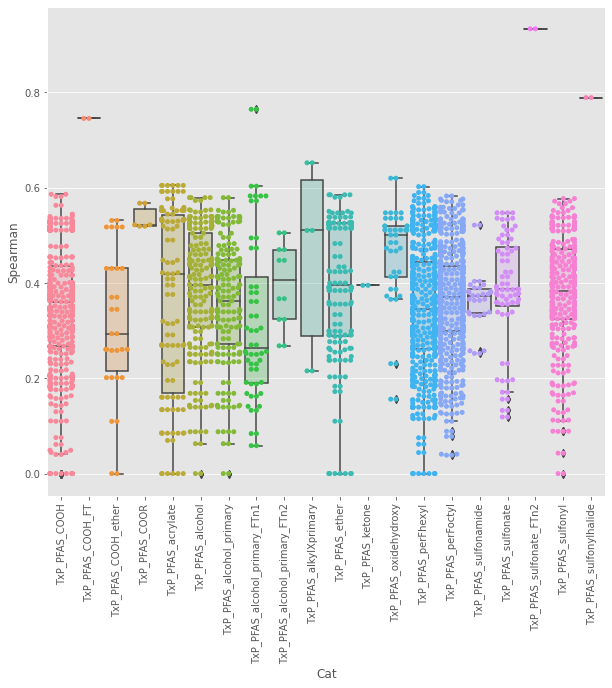

In [170]:
plt.style.use('ggplot')
plt.figure(figsize= (10,9))
ax = sns.boxplot(x = spearman_cats_f.Cat, y = spearman_cats_f.Spearman, data = spearman_cats_f)
ax = sns.swarmplot(x = spearman_cats_f.Cat, y = spearman_cats_f.Spearman, data = spearman_cats_f)
for patch in ax.artists:
    r,g,b,a = patch.get_facecolor()
    patch.set_facecolor((r,g,b,0.3))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.savefig(figures_dir+'Spearman_all_cats.png', dpi=300, bbox_inches="tight")